<div style="font-size:1.4em; margin-bottom:2em">
    <div style="float:right; line-height:1.2em;">GET Lab<br />Paderborn University</div>
  <div>SS 2021</div>
</div>
<div style="clear:both"></div>
<div style="text-align:center; font-size:1.8em;">
  Digital Image Processing II<br />Task Sheet 5
</div>

<hr>

### Overview

The next step after image segmentation is typically feature extaction. Region boundaries are one example for such features. Many algorithms which work on boundaries require that the boundary points are ordered and accessible in a clockwise or counterclockwise direction. Boundary following algorithms trace a boundary by identifying a starting pixel and systematically analyzing the neighborbood while following the boundary. A simple algorithm for this is the *Moore boundary tracing algorithm*, which we study in task 5.1. The traced boundaries can then be described by chain codes, specific approximations, signatures, and other methods. The following animation illustrates the algorithm (see task 5.1 for details):

<center><img src="images/animation-tracing.gif" /></center>

Another method to describe boundaries is using Fourier descriptors. The idea is that the coordinate pairs of the boundary can be intepreted as complex numbers. The representation can then be transformed to and manipulated in the frequency domain. For example, higher frequencies can be removed so that the boundary is smoothed. This is what we study in task 5.2.

---

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

dpi = plt.rcParams['figure.dpi']

# plot image in original size
def plot_img_orig(img):
    fig = plt.figure(figsize = (img.shape[1]/dpi, img.shape[0]/dpi))
    fig.add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255) # cmap parameter is ignored for RGB(A) data
    plt.show()

#### <span style="color: RoyalBlue; font-weight: bold;">Task 5.1</span> Boundary Following (Tracing)

The Moore boundary tracing algorithm for binary images can be summarized as follows:

1. Let the starting point, $b_0$, be the uppermost-leftmost boundary point in the image. Denote by $c_0$ the west neighbor of $b_0$ (which is always a background point). Scan the 8-neighbors of $b_0$ in a clockwise direction, starting at $c_0$. Let $b_1$ denote the first boundary point encountered and let $c_1$ be the (background) point immediately preceding $b_1$ in the scan.
2. Let $b = b_1$ and $c = c_1$.
3. Let the 8-neighbors of $b$ be denoted by $n_1, n_2,\dots, n_8$, starting at $c$ and proceeding in a clockwise direction. Find the first neighbor which is a boundary point and denote it $n_k$.
4. Let $b = n_k$ and $c = n_{k–1}$ ($c$ is again the point immediately preceding $b$).
5. Repeat Steps 3 and 4 until $b = b_0$. The set of ordered boundary points is the sequence of $b_i$.

Note: In this form, the algorithm can only trace simple and well-formed boundaries (closed boundaries and boundaries of well-formed regions). In particular, it should be provided that $b_0$ can be reached directly. Otherwise, pixels may be traced several times. An additional check whether a pixel has already been traced is a possible extension. Furthermore, it is assumed that there are no boundary pixels at the image border and that there is only one boundary or region in the image. The method can be extended to multiple regions by processing the regions individually.

Implement / solve the following tasks:
1. Read a test image as a grayscale image and plot it.
2. Write a function which implements the steps 1-4 of the algorithm.
3. Implement step 5 by integrating the steps 3 and 4 into an appropriate while loop.
4. Plot the traced boundary with consecutive numbering of the points.

Input image:


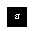

Starting pixel = [[7, 9]]
Boundary length = 14
Traced boundary:


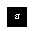

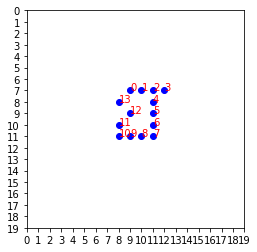

In [2]:
# write your code here

# read the image as a grayscale image (parameter 0) and plot it
img = cv2.imread('images/shape-01.png', 0)
rows, cols = img.shape
print("Input image:")
plot_img_orig(img)

# example: append pairs of values to list, then clear again
# res = [] # empty list for tracing result
# print(res)
# res.append([1, 2])
# res.append([3, 4])
# print(res)
# print(res[1][1]) # second value of second entry
# res = [] # clear list

# clockwise search of next neighbor to b starting at c
def searchNeighbor(img, b, c):
    i = b[0]; j = b[1] # coordinates of current boundary pixel b
    # values and positions of 8-neighborhood
    nbh = [img[i-1, j-1], img[i-1, j], img[i-1, j+1], img[i, j+1], img[i+1, j+1], img[i+1, j], img[i+1, j-1], img[i, j-1]]
    pos = [[i-1, j-1], [i-1, j], [i-1, j+1], [i, j+1], [i+1, j+1], [i+1, j], [i+1, j-1], [i, j-1]]
    
    # control outputs
    #print("nbh = " + str(nbh))
    #print("pos = " + str(pos))
    
    start = -1
    # determine starting pixel position in neighborhood
    if c[0] == i-1 and c[1] == j-1:
        start = 0
    elif c[0] == i-1 and c[1] == j:
        start = 1
    elif c[0] == i-1 and c[1] == j+1:
        start = 2
    elif c[0] == i and c[1] == j+1:
        start = 3
    elif c[0] == i+1 and c[1] == j+1:
        start = 4
    elif c[0] == i+1 and c[1] == j:
        start = 5
    elif c[0] == i+1 and c[1] == j-1:
        start = 6
    elif c[0] == i and c[1] == j-1:
        start = 7
        
    # search for next neighbor in nbh beginning at start
    idx = -1
    for k in range(8):
        idx = (k + start) % 8
        if nbh[idx] > 0: # next neighbor found
            break
            
    # return position of next neighbor and preceding position
    return pos[idx], pos[idx-1]

# trace boundary in given input image
def traceBoundary(img):
    # iterate over image: search for uppermost-leftmost pixel
    rows, cols = img.shape
    b0 = [-1, -1]; c0 = [-1, -1] # init
    break_flag = False # flag to break outer for loop
    for i in range(rows):
        for j in range(cols):
            if img[i, j] > 0:
                b0 = [i, j] # uppermost-leftmost pixel
                c0 = [i, j-1] # west-neighbor of b0

                # break inner and outer for loop
                break_flag = True
                break

        if break_flag:
            break

    # append first pixel to list with traced pixels
    res = []
    res.append(b0)
    print("Starting pixel = " + str(res))

    # get b1 and c1
    b1, c1 = searchNeighbor(img, b0, c0)

    # repeat search until b = b0
    b = b1; c = c1
    while not (b == b0):
        res.append(b) # append next value
        b, c = searchNeighbor(img, b, c)
        
    return res
    
# trace boundary and print length
res = traceBoundary(img)
print("Boundary length = " + str(len(res)))
    
# plot traced boundary
img_res = np.zeros(img.shape, dtype=np.uint8)
for i in range(len(res)):
    img_res[res[i][0], res[i][1]] = 255

print("Traced boundary:")
plot_img_orig(img_res)

# plot traced edge
for i in range(len(res)):
    plt.plot(res[i][1], res[i][0], 'bo') # x is the horizontal axis here
    plt.text(res[i][1], res[i][0], str(i), color="red")

plt.xticks(np.arange(rows))
plt.yticks(np.arange(cols))
plt.gca().invert_yaxis() # invert y-axis
plt.gca().set_aspect('equal') # equal scales of axes
plt.show()

#### <span style="color: RoyalBlue; font-weight: bold;">Task 5.2</span> Fourier Descriptors

A traced boundary with $K$ points ($K$ should be even here, see below for explenation) can be represented as the sequence of coordinates $s(k) = [x(k), y(k)]$ for $k = 0, 1, 2, \dots, K-1$. Each coordinate pair can then be interpreted as a complex number as follows:

$$s(k) = x(k) + jy(k)$$

In other words, the $x$-axis is treated as the real axis and the $y$-axis as the imaginary axis. The discrete Fourier transform (DFT) of this sequence is another sequence of complex coeffiencts $a(u)$ for $u = 0, 1, 2, \dots, K-1$. The inverse DFT (IDFT) of this sequence restores $s(k)$.

If only the first $P$ coefficients are used for the IDFT, while the others are set to zero, the result is an approximation of $s(k)$. In particular, setting high-frequency coefficients to zero is the same as filtering with an ideal lowpass filter.

Implement / solve the following tasks:
1. Trace a boundary in a test image (for example, use the function from the previous task).
2. Compute the complex represenation of the traced boundary.
3. Compute the corresponding DFT.
4. Set the high-frequency coefficients to zero so that only the first $P$ coefficients are used.
5. Compute the corresponding IDFT and plot the result.

For computing the DFT and IDFT, the Numpy functions <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html">`np.fft.fft`</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html">`np.fft.ifft`</a> can be used. The high-frequency coefficients have to be removed in a symmetric manner (positive and negative frequencies), which is why the DFT has to be centered (shifted). Then, half the number of coefficients can be set zero on each end of the centered DFT. This also why $K$ should be even. For shifting and backshifting, the Numpy functions <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html">`np.fft.fftshift`</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html">`np.fft.ifftshift`</a> can be used. 

Note: Depending on the contour, the method can be highly sensitive to $P$.

Input image:


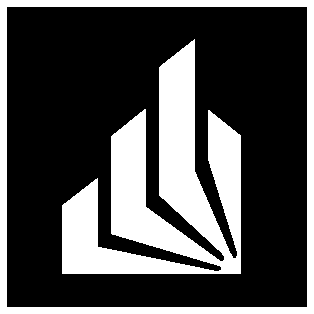

Starting pixel = [[32, 187]]
Traced boundary:


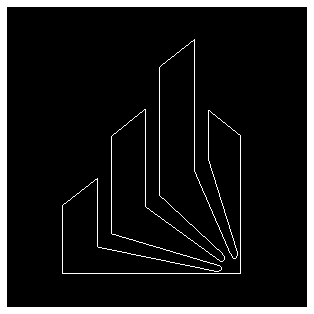

Reconstructed boundary:


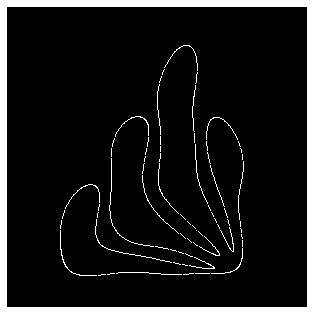

In [3]:
# write your code here

# read the image as a grayscale image (parameter 0) and plot it
img = cv2.imread('images/upb-logo-binary.png', 0)
print("Input image:")
plot_img_orig(img)

# trace boundary
res = traceBoundary(img)

# plot traced boundary
img_res = np.zeros(img.shape, dtype=np.uint8)
for i in range(len(res)):
    img_res[res[i][0], res[i][1]] = 255

print("Traced boundary:")
plot_img_orig(img_res)

# interprete coordinate pairs as complex numbers
seq = np.zeros(len(res), dtype=np.complex64) # empty numpy array
for i in range(len(res)):
    seq[i] = complex(res[i][0], res[i][1]) # save complex number

# compute centered FFT of sequence
seq_fft = np.fft.fft(seq)
seq_fft = np.fft.fftshift(seq_fft)

# only use P coefficients, set remaining ones to zero
P = 20 # number of terms to be used
c = int(len(seq)/2) # center in sequence (right center side)
seq_fft[0:c-P] = 0 # left side
seq_fft[c+P:len(seq)] = 0 # right side

# backshift and compute IFFT of sequence
seq_r = np.fft.ifftshift(seq_fft)
seq_r = np.fft.ifft(seq_r)

# plot reconstructed boundary
img_rec = np.zeros(img.shape, dtype=np.uint8)
for i in range(len(seq_r)):
    img_rec[int(round(seq_r[i].real)), int(round(seq_r[i].imag))] = 255
    
print("Reconstructed boundary:")
plot_img_orig(img_rec)